<a href="https://colab.research.google.com/github/JoseLuis-AL/MCD-Indice-De-Marginacion-En-Mexico/blob/main/JLAL_Programaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índices de marginación en México

Aspirante: Aguilera Luzania José Luis  
Curso propedéutico de la Maestría en Ciencia de Datos: Programación

Se realizará un análisis sobre los índices de marginación por municipio en México.

## A. Datos

Se puede consultar los datos desde la página del gobierno de méxico: [índices de marginación 2020](https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372).

### Importar los datos

Con el fin de no almacenar archivos de datos de forma inecesaria, los archvios se descargarán los archivos por medio del comando `wget`.

In [3]:
!wget "http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls"

--2023-06-10 22:12:59--  http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls
Resolving www.conapo.gob.mx (www.conapo.gob.mx)... 187.218.29.192
Connecting to www.conapo.gob.mx (www.conapo.gob.mx)|187.218.29.192|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1640448 (1.6M) [application/vnd.ms-excel]
Saving to: ‘IMM_2020.xls’

IMM_2020.xls        100%[===================>]   1.56M  1.92MB/s    in 0.8s    

2023-06-10 22:13:01 (1.92 MB/s) - ‘IMM_2020.xls’ saved [1640448/1640448]



<p align="justify">

Los datos descargados se encuentran en un archivo 

## Librerías

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## B. Análisis de los datos

<p align="justify">

In [370]:
df_datos = pd.read_excel("IMM_2020.xls", sheet_name="IMM_2020")
df_datos.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


### Columnas del DataFrame

* CVE_ENT: Clave de la entidad federativa.
* NOM_ENT: Nombre de la entidad federativa.
* CVE_MUN: Clave del municipio.
* NOM_MIN: Nombre del minicipio.
* POB_TOT: Población total.
* ANALF: % Población de 15 años o más analfabetas.
* SBASC: % Población de 15 años o más sin educación básica.
* OVSDE: % Ocupantes en viviendas particulares sin drenaje ni excusado.
* OVSEE: % Ocupantes en viviendas particulares sin elergía eléctrica.
* OVSAE: % Ocupantes en viviendas particulares sin agua entubada.
* OVPT: % Ocupantes en viviendas particulares con piso de tierra.
* VHAC: % Viviendas particulares con hacinamiento
* PL.5000: % Población en localidades con menos de 5 000 habitantes
* PO2SM: % Población ocupada con ingresos menores a 2 salarios mínimos
* IM_2020: Índice de marginación, 2020
* GM_2020: Grado de marginación, 2020
* IMN_2020: Índice de marginación normalizado, 2020

### Descripción de los datos

<p align="justify">Primero eliminamos las columnas numéricas que no son relevantes para la descripción de los datos como `CVE_ENT` (clave de entidad), `CVE_MUN` (clave de municipio) y después utilizamos el método `describe` del dataframe par amostrar una descripción de los datos.

In [371]:
df_descripcion = df_datos.drop(columns = ["CVE_ENT", "CVE_MUN"])
df_descripcion.describe()

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


<p align="justify">Con un análisis simple se puede observar que:

- En promedio un 10% de la población con 15 años o más es analfabeta. Hay municipios donde un 53% de la población tiene analfabetismo.
- En promedio un 45% de la población con 15 años o más no tiene educación básica. Hay municipios donde el 88% de la población no tiene educación básica.
- En promedio el 70% de los municipios tienen menos de 5000 habitantes.
- En promedio hay 82% de las poblaciones ocupan salarios menores a 2 ingresos mínimos.


### C. Gráfica del grado de marginación por municipio.

In [442]:
# Creamos una copia de los datos.
df_poblacion = df_datos.copy(deep = True)

# Agrupamos los datos.
df_mun = df_poblacion.groupby(["NOM_ENT", "GM_2020"])["CVE_ENT"].count()
df_mun = df_mun.to_frame()

# Reiniciamos el index.
df_mun = df_mun.reset_index()

# Renombramos los index para poder unirlo de nuevo.
df_mun = df_mun.rename(columns={"CVE_ENT": "C_Entidad", "NOM_ENT": "N_Estado", "GM_2020": "Marginacion"})

# Mostramos los datos.
df_mun.head()

,N_Estado,Marginacion,C_Entidad
0,Aguascalientes,Muy bajo,11
1,Baja California,Medio,1
2,Baja California,Muy bajo,5
3,Baja California Sur,Muy bajo,5
4,Campeche,Alto,2


In [447]:
# Obtenemos las claves únicas de las entidades federativas.
df_municipios = df_mun["N_Estado"].unique()

# Obtenemos el grado de marginación.
grado = df_mun["Marginacion"].unique()

# Se reindexan los contenidos de los de los DataFrame para poder calcular los porcentajes.
df_mun = (df_mun.set_index(["N_Estado", "Marginacion"])
          .reindex(pd.MultiIndex.from_product([df_municipios, grado], names = ["N_Estado", "Marginacion"]))
          .reset_index())

# Remplazamos los valores NaN con ceros.
df_mun["C_Entidad"] = df_mun["C_Entidad"].fillna(0)

In [448]:
# Número de municipios.
num_municipios = df_datos.groupby(["NOM_ENT"]).count()["CVE_ENT"].values

# Mostrar los datos.
num_municipios

array([ 11,   6,   5,  12, 124,  67,  16,  38,  10,  39,  46,  81,  84,
       125, 113,  36, 125,  20,  51, 570, 217,  18,  11,  58,  18,  72,
        17,  43,  60, 212, 106,  58])

In [457]:
# Copiamos el DataFrame con los valores del municipio.
df_porcentaje_mun = df_mun.copy()

# Calculamos el procentaje por municipio.
df_porcentaje_mun["POR_MUN"] = (df_porcentaje_mun["C_Entidad"] / np.repeat(num_municipios, 5))

# Mostrar resultados.
df_porcentaje_mun.head()

,N_Estado,Marginacion,C_Entidad,POR_MUN
0,Aguascalientes,Muy bajo,11.0,1.0
1,Aguascalientes,Medio,0.0,0.0
2,Aguascalientes,Alto,0.0,0.0
3,Aguascalientes,Bajo,0.0,0.0
4,Aguascalientes,Muy alto,0.0,0.0


In [461]:
df_porcentaje_mun.reset_index().groupby(['N_Estado', 'Marginacion'])['POR_MUN'].aggregate('first').unstack()
df_porcentaje_mun.head()

,N_Estado,Marginacion,C_Entidad,POR_MUN
0,Aguascalientes,Muy bajo,11.0,1.0
1,Aguascalientes,Medio,0.0,0.0
2,Aguascalientes,Alto,0.0,0.0
3,Aguascalientes,Bajo,0.0,0.0
4,Aguascalientes,Muy alto,0.0,0.0


#### Gráfica


In [ ]:
# Configuración de la gráfica.
fig = plt.subplots(figsize =(15, 8))

# Tamaño de la barra.
tam_barra = 0.2

# Contenido de la gráfica.
X_axis = np.arange(len(df_grados["NOM_ENT"]))
plt.bar(X_axis - tam_barra*2, df_grados["Alto"], width=tam_barra, label = "Alto")
plt.bar(X_axis - tam_barra, df_grados["Bajo"], width=tam_barra, label = "Bajo")
plt.bar(X_axis, df_grados["Medio"], width=tam_barra, label = "Medio")
plt.bar(X_axis + tam_barra, df_grados["Muy alto"], width=tam_barra, label = "Muy alto")
plt.bar(X_axis + tam_barra*2, df_grados["Muy bajo"], width=tam_barra, label = "Muy bajo")

# Información de la gráfica.
plt.title("Grado de marginación respecto a la entidad federativa")
plt.xlabel("Entidad federativa")
plt.ylabel("Porcentaje")
plt.xticks([r for r in range(len(df_grados["NOM_ENT"]))], df_grados["NOM_ENT"], rotation = 90)
plt.legend()

# Guardamos la gráfica.
plt.savefig("grado_marginacion_municipio.png")

# Mostrar la gráfica.
plt.show()

### D. Gráfica del grado de marginación

Pasos a seguir


1. Obtener el total de población por entidad federativa.
2. Obtener el total de población por grados de marginación de cada entidad federativa.
3. Convertir a porcentajes los totales por grados de marginación.
4. Crear una gráfica.    



In [316]:
df_poblacion = df_datos.copy(deep = True)

#### 1. Total de la población por entidades federativas

<p align="justify">El total de población por entidades se puede obtener agrupando los datos usando el método `groupby` en la columna "NOM_ENT" y sumando los resultados con el método `sum`. Para poder utilizar los totales se convierte la serie en un diccionario con el método `to_dict`.

In [317]:
# Calculamos el total de la población.
df_total_poblacion = df_poblacion.groupby(["NOM_ENT"])['POB_TOT'].sum()

# Convertimos el resultado en un DataFrame y reiniciamos el index.
df_total_poblacion = df_total_poblacion.to_frame().reset_index()

# Mostramos los datos.
df_total_poblacion.head()

,NOM_ENT,POB_TOT
0,Aguascalientes,1425607
1,Baja California,3769020
2,Baja California Sur,798447
3,Campeche,928363
4,Chiapas,5543828


#### 2. Total de población por grados de marginación

<p align="justify">Utilizando una metodología similar al punto 1, es posible obtener el total de la población en base al grado de marginación. Aunque se debe tener cuidado con los datos, ya que algunos como Aguascalientes no tienen índices alto, bajo, medio o muy alto; por lo que se debe tener en cuenta los datos de tipo `NaN`.

In [318]:
# Obtenemos los grados de marginación de cada entidad federativa.
df_grados = pd.DataFrame(df_poblacion.groupby(["NOM_ENT", "GM_2020"])['POB_TOT'].sum().unstack())

# Reiniciamos el index convirtiendo los nombres de la entidad federativa en una columna.
df_grados.reset_index(inplace = True)

# Remplazamos los valores 'NaN' por 0 en las columnas de los grados.
for columna in df_grados:
    df_grados[columna] = df_grados[columna].replace('NaN', np.nan).fillna(0)

# Mostramos los datos.
df_grados.head()

GM_2020,NOM_ENT,Alto,Bajo,Medio,Muy alto,Muy bajo
0,Aguascalientes,0.0,0.0,0.0,0.0,1425607.0
1,Baja California,0.0,0.0,117568.0,0.0,3651452.0
2,Baja California Sur,0.0,0.0,0.0,0.0,798447.0
3,Campeche,78627.0,255991.0,50823.0,0.0,542922.0
4,Chiapas,1720632.0,998167.0,1177464.0,1043418.0,604147.0


#### 3. Convertir en porcentajes

<p align="justify">Con los grados de marginación como columnas de cada entidad federativa y conciendo el total de población de cada entidad, es posible convertir los grados de marginación en porcentajes de la población total de la entidad.

In [319]:
def convertir_porcentaje(columna):
  df_grados[columna] = (df_grados[columna] / df_total_poblacion["POB_TOT"][df_grados.index]) * 100

# Remplazamos los valores 'NaN' por 0 en las columnas de los grados.
convertir_porcentaje("Alto")
convertir_porcentaje("Bajo")
convertir_porcentaje("Medio")
convertir_porcentaje("Muy alto")
convertir_porcentaje("Muy bajo")

# Mostrar los datos.
df_grados.head(10)

GM_2020,NOM_ENT,Alto,Bajo,Medio,Muy alto,Muy bajo
0,Aguascalientes,0.000000,0.000000,0.000000,0.000000,100.000000
1,Baja California,0.000000,0.000000,3.119325,0.000000,96.880675
2,Baja California Sur,0.000000,0.000000,0.000000,0.000000,100.000000
3,Campeche,8.469424,27.574451,5.474475,0.000000,58.481650
4,Chiapas,31.036894,18.005014,21.239187,18.821255,10.897651
5,Chihuahua,0.697726,2.734730,0.536924,4.892154,91.138466
6,Ciudad de México,0.000000,0.000000,0.000000,0.000000,100.000000
7,Coahuila de Zaragoza,0.000000,1.612955,0.000000,0.000000,98.387045
8,Colima,0.000000,4.545995,0.000000,0.000000,95.454005
9,Durango,4.097073,5.978719,2.084522,4.086050,83.753635


#### 4. Gráfica

<p align="justify">Utilizando la librería `mathplotlib` podemos crear una gráfica utilizando el DataFrame de los grados.

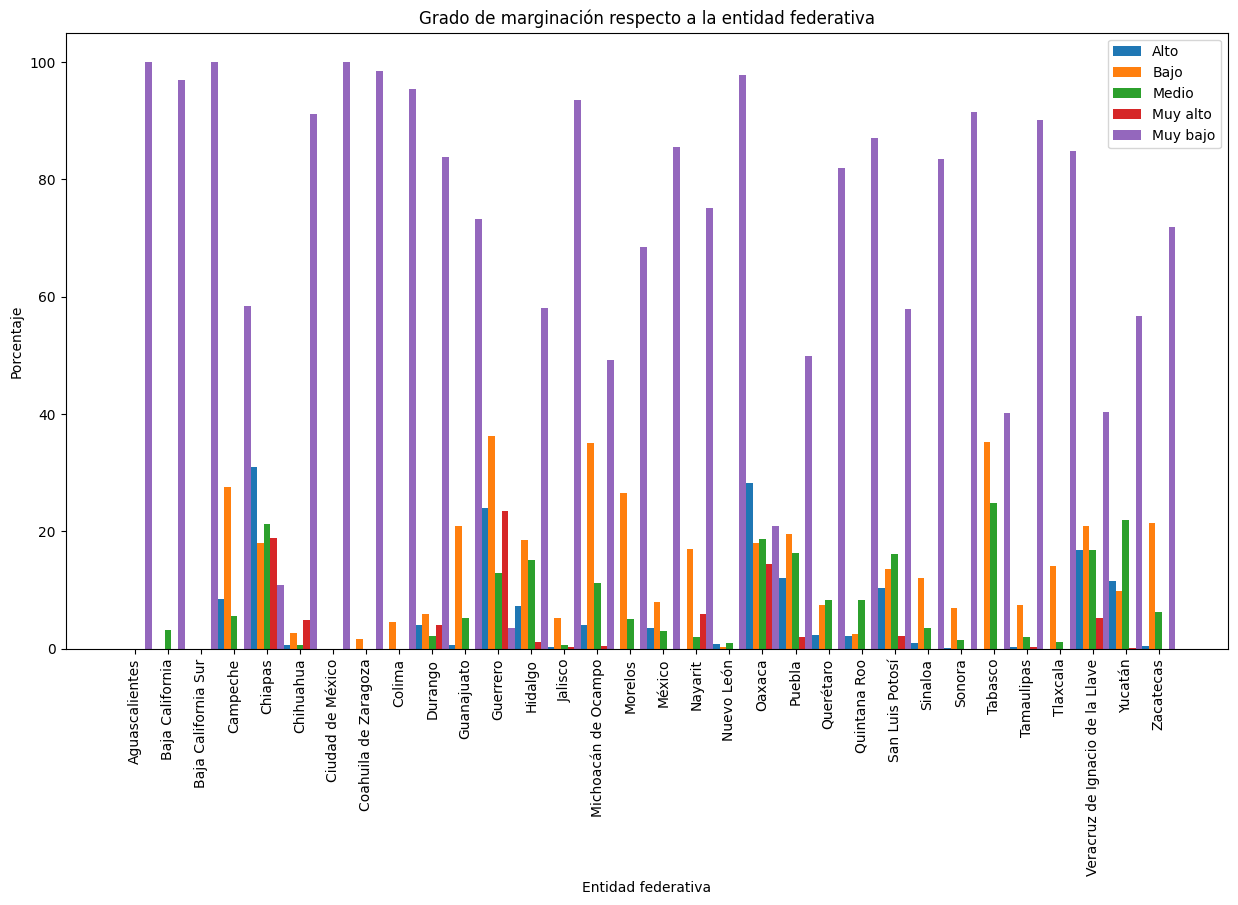

In [360]:
# Configuración de la gráfica.
fig = plt.subplots(figsize =(15, 8))

# Tamaño de la barra.
tam_barra = 0.2

# Contenido de la gráfica.
X_axis = np.arange(len(df_grados["NOM_ENT"]))
plt.bar(X_axis - tam_barra*2, df_grados["Alto"], width=tam_barra, label = "Alto")
plt.bar(X_axis - tam_barra, df_grados["Bajo"], width=tam_barra, label = "Bajo")
plt.bar(X_axis, df_grados["Medio"], width=tam_barra, label = "Medio")
plt.bar(X_axis + tam_barra, df_grados["Muy alto"], width=tam_barra, label = "Muy alto")
plt.bar(X_axis + tam_barra*2, df_grados["Muy bajo"], width=tam_barra, label = "Muy bajo")

# Información de la gráfica.
plt.title("Grado de marginación respecto a la entidad federativa")
plt.xlabel("Entidad federativa")
plt.ylabel("Porcentaje")
plt.xticks([r for r in range(len(df_grados["NOM_ENT"]))], df_grados["NOM_ENT"], rotation = 90)
plt.legend()

# Guardamos la gráfica.
plt.savefig("grado_marginacion.jpg")

# Mostrar la gráfica.
plt.show()

#### Análisis

<p align="justify">Se puede observar entidades como Aguscalientes con un índice de Muy Bajo de marginación, mientras tiene mucha población. También se puede observar otros como Baja California, Ciudad de México y Sinaloa con índices Muy Bajos de marginación y mucha población.

### F. Grafica del analfabetismo

<p align="justify">Para generar una gráfica que explique las relación entre dos variables usaremos una gráfica de dispersion o scatter plot. La relación entre las variables que queremos análizar es la del analfabetismo y las poblaciones con menos de 5000 habitantes. POr suerte el DataFrame ya tiene las columnas ANALF y PL.5000 que muestran el procentaje de analfabetismo y el porcentaje de menos de 5000 habitantes en un municipio respectivamente.


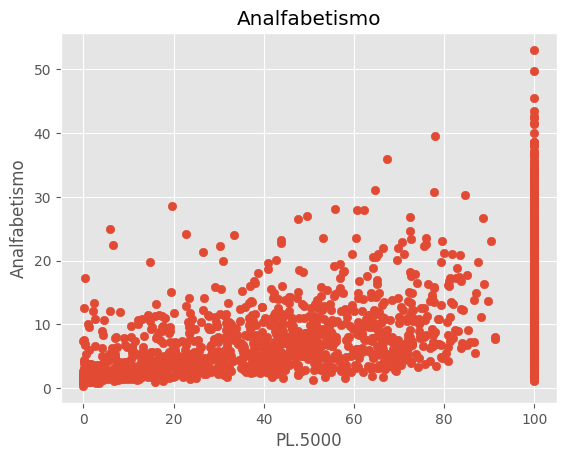

In [369]:
# Establecemos el estilo de la gráfica.
with plt.style.context(('ggplot')):

  # Configuración de la gráfica.
  fig, ax = plt.subplots()

  # Tamaño y color.
  sizes = np.random.uniform(15, 80, len(x))
  colors = np.random.uniform(15, 80, len(x))

  # Mostrar los datos.
  ax.scatter(df_datos["PL.5000"], df_datos["ANALF"])

  # Información de la gráfica.
  plt.title("Analfabetismo")
  plt.xlabel("PL.5000")
  plt.ylabel("Analfabetismo")

  # Mostrar la gráfica.
  plt.show()

#### G. Análisis

<p align="justify">1. Se puede observar una relación entre el analfabetismo y el númerp de habitantes. Sin embargo, no en todos los casos, por lo que podrían no estar relacionadas.

<p align="justify">2. Para comprobar la relación que hay entre el analfabetismo y otras variables se puede usar el método `corr` del dataframe con el fin de entontrar la correlación entre todas las columnas.

In [362]:
# Obtenemos la correlación de las columnas usando solo las columnas numáricas.
correlacion = df_datos.select_dtypes(include = np.number).corr()["ANALF"]

# Mostrar los resultados.
correlacion.sort_values()

IMN_2020   -0.847822
IM_2020    -0.847822
POB_TOT    -0.236801
CVE_ENT     0.008475
CVE_MUN     0.013398
OVSDE       0.347537
OVSEE       0.351523
OVSAE       0.360644
PL.5000     0.449324
PO2SM       0.620011
OVPT        0.644960
VHAC        0.658532
SBASC       0.779053
ANALF       1.000000
Name: ANALF, dtype: float64

<p align="justify">Aquí se puede observar que la correlación con la variable PL.5000 no es tan fuerte como se pensaba al observar la gráfica. También se puede observar que hay una mayor relación con la variable SBASC (% Población de 15 años o más sin educación básica).